<a href="https://colab.research.google.com/github/goodgerm/AISPEECH/blob/main/speechlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install sounddevice
!pip install pydub

In [22]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

Playing First Derivative Signal:


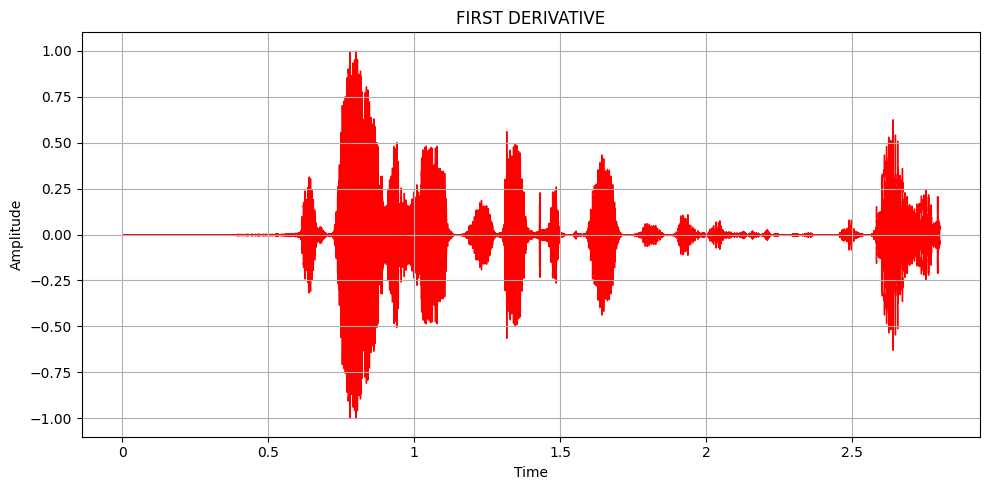

In [24]:
# Load audio file
audio_signal, sample_rate = librosa.load("/content/Recording.wav")

# Compute first derivative of the audio signal
first_derivative = np.diff(audio_signal)
first_derivative /= np.max(np.abs(first_derivative))  # Normalize

print("Playing First Derivative Signal:")

# Plotting the first derivative
plt.figure(figsize=(10, 5))
librosa.display.waveshow(first_derivative, sr=sample_rate, color='red')
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Play the first derivative of the audio signal
ipd.Audio(first_derivative, rate=sample_rate)

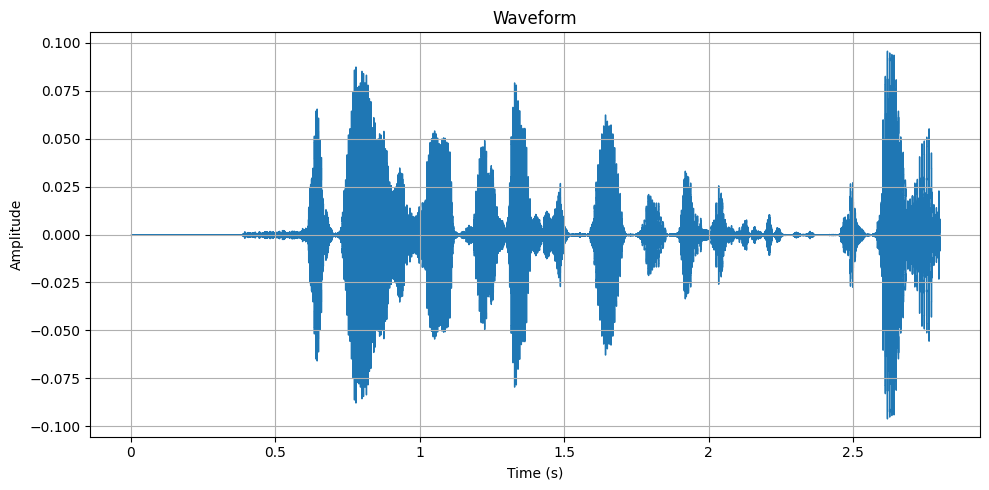

In [25]:
plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio_signal, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
# Playing back the audio
ipd.Audio(audio_signal, rate=sample_rate)

A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-26-610255c25270>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
<ipython-input-26-610255c25270>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence intervals', color='green')


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 4.077700904736562


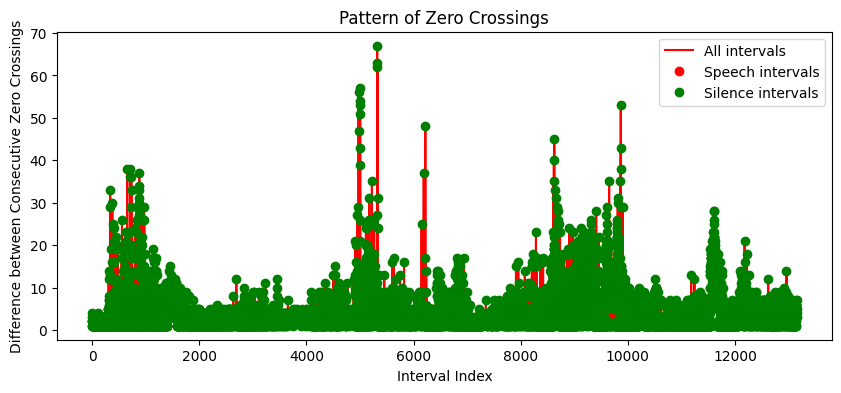

In [26]:

zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
zero_crossing_diffs = np.diff(zero_crossings)
threshold = 1000

# Distinguish between speech and silence based on the threshold
speech_intervals = zero_crossing_diffs[zero_crossing_diffs > threshold]
silence_intervals = zero_crossing_diffs[zero_crossing_diffs <= threshold]

# Calculate average lengths
avg_speech_interval_length = np.mean(speech_intervals)
avg_silence_interval_length = np.mean(silence_intervals)

# Print average lengths
print("Average length between consecutive zero crossings in speech regions:", avg_speech_interval_length)
print("Average length between consecutive zero crossings in silence regions:", avg_silence_interval_length)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(zero_crossing_diffs, label='All intervals', color='red')
plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence intervals', color='green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Interval Index')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

The length Duration of first audio file: 2.56 seconds
The length Duration of Second audio file: 2.98 seconds


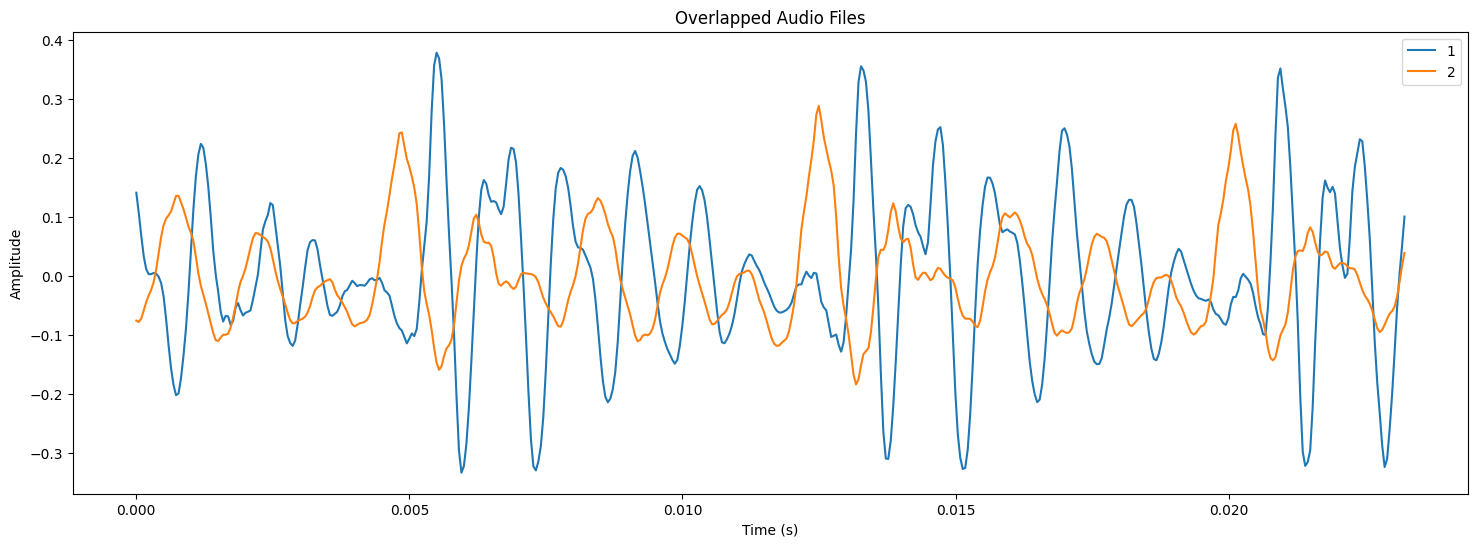

In [28]:
gk = r'/content/Recording (2).wav'
aqs = r'/content/Recording (3).wav'

# Load audio signals
y1, sr1 = librosa.load(gk)
y2, sr2 = librosa.load(aqs)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
qw1 = remove_silence(y1, sr1)
qw2 = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(qw1) / sr1, len(qw1))
time2 = np.linspace(0, len(qw2) / sr2, len(qw2))

# Plot the trimmed audio files
plt.figure(figsize=(18, 6))
plt.plot(time1, qw1, label='1')
plt.plot(time2, qw2, label='2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

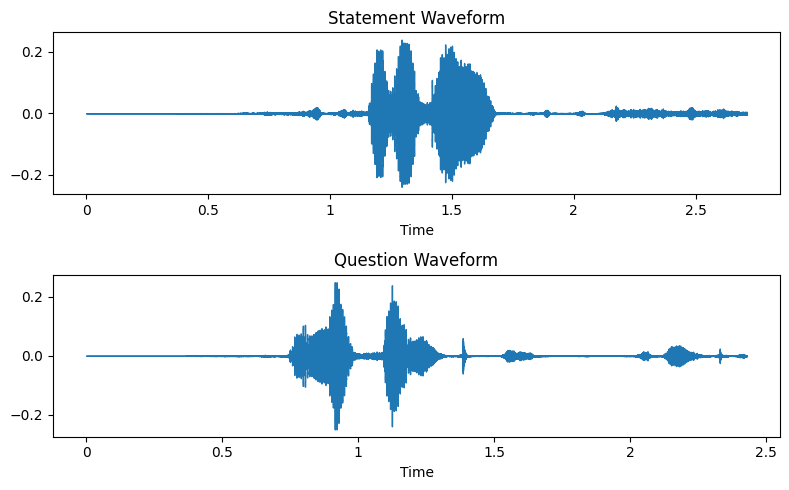

In [29]:
file_1 = r'/content/Recording (5).wav'
file_2 = r'/content/Recording (6).wav'
statement_signal, sr_statement = librosa.load(file_1) # Load audio signals
question_signal, sr_question = librosa.load(file_2)
plt.figure(figsize=(8,5))
# Plot waveforms
plt.subplot(2, 1, 1)
librosa.display.waveshow(statement_signal, sr=sr_statement)
plt.title('Statement Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(question_signal, sr=sr_question)
plt.title('Question Waveform')
plt.tight_layout()
plt.show()